### Таликов А.Ю. 18-ИВТ-3
### Лабораторная работа № 3 – Регрессионный анализ данных
### Вариант 17
### Набор данных: 5
#### Кодировка классификаторов:
#### 1 –  линейная регрессия без использования регуляризаторов;
#### 3 – линейная регрессия, RIDGE регуляризатор;

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
import warnings
warnings.simplefilter('ignore')
from pylab import rcParams

energy = pd.read_csv('energydata_complete.csv')
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


####  1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

- data - дата время год-месяц-день час: минута: секунда 
- appliances - Приборы, использование энергии в ватт-часах
- lights - Свет, энергопотребление осветительных приборов в доме в ватт-часах
- T1 - Температура на кухне, в градусах Цельсия
- RH_1 - Влажность на кухне, в %
- T2 - Температура в гостиной, в градусах Цельсия
- RH_2 - Влажность в гостиной, в %
- T3 - Температура в прачечной, в градусах Цельсия
- RH_3 - Влажность в прачечной, в %
- T4 - Температура в офисе, в градусах Цельсия
- RH_4 - Влажность в офисном помещении, в %
- T5 - Температура в ванной, в градусах Цельсию
- RH_5 - Влажность в ванной, в %
- T6 - Температура снаружи здания (северная сторона), по Цельсию
- RH_6 - Влажность вне здания (северная сторона), в %
- T7 - Температура в гладильной комнате, в градусах Цельсия
- RH_7 - Влажность в гладильной комнате, в %
- T8 - Температура в комнате для подростков 2, в градусах Цельсия
- RH_8 - Влажность в комнате подростка 2, в %
- T9 - Температура в комнате родителей, в градусах Цельсия
- RH_9 - Влажность в комнате родителей, в %
- T_out - Температура снаружи, по Цельсию
- Pressure - Давление, мм рт.
- RH_out - Влажность снаружи, в %
- Wind speed - Скорость ветра, м / с 
- Visibility - Видимость, км
- Tdewpoint - температура точки росы, ° C
- rv1 - Случайная переменная 1, безразмерная
- rv2 - Случайная переменная 2, безразмерная

#### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [2]:
print("Размер набора данных до удаления:", energy.shape)
energy = energy.drop_duplicates()
print("Размер набора данных после удаления:", energy.shape)

Размер набора данных до удаления: (19735, 29)
Размер набора данных после удаления: (19735, 29)


#### 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [5]:
numer_columns = [i for i in energy.columns if energy[i].dtype.name != 'object']
print("Numerical: " + str(numer_columns))

Numerical: ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


 ##### До масштабирования

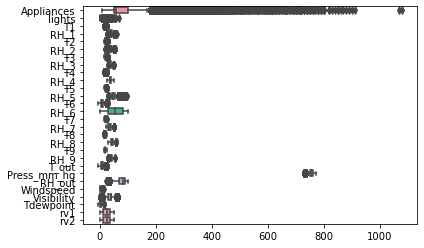

In [6]:
sns.boxplot(data = energy, orient = 'h')
plt.show()

##### После масштабирования (способ масштабирования стандартизация)

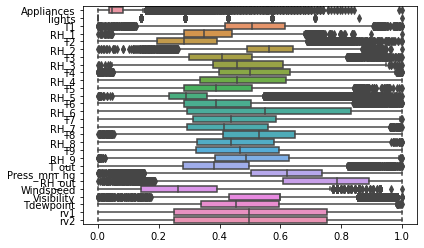

In [7]:
scal = preprocessing.MinMaxScaler()
energy[numer_columns] = scal.fit_transform(energy[numer_columns])
sns.boxplot(data=energy[numer_columns], orient="h")
plt.show()

#### 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [8]:
categorical_columns = [c for c in energy.columns if energy[c].dtype.name == 'object']
numerical_columns   = [c for c in energy.columns if energy[c].dtype.name != 'object']
print (f"Категоиальные признаки: {categorical_columns}")
print (f"Числовые признаки: {numerical_columns}")

Категоиальные признаки: ['date']
Числовые признаки: ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [9]:
energy[categorical_columns].describe()

,date
count,19735
unique,19735
top,2016-04-27 20:30:00
freq,1


Замена не требуется, потому что все значения уникальные

#### 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

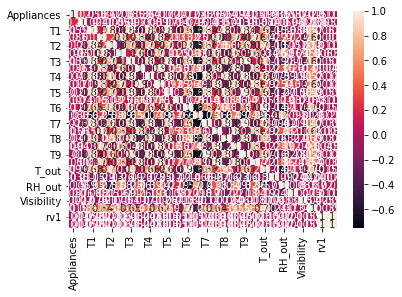

In [10]:
df_corr = energy.corr()
sns.heatmap(df_corr, annot = True)

#### 6.	Заполните пропущенные значения в данных;

In [11]:
energy.count()

date           19735
Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
rv1            19735
rv2            19735
dtype: int64

 Пропущенных значений нет

#### 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

1 – линейная регрессия без использования регуляризаторов;¶


In [12]:
energy.drop(['date'], axis = 1, inplace=True)

In [13]:
data_x = energy.drop(['T1'], axis = 1)
data_y = energy['T1']
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 0)
l_r = LinearRegression()
l_r.fit(X_train, y_train)
pred = l_r.predict(X_test)

print(pred[:10] - y_test[:10])

15563    0.017010
12564   -0.020267
10649    0.000047
16554   -0.029016
8130     0.022968
16981    0.005279
8164     0.004356
14583   -0.023447
18716   -0.031463
18643    0.005453
Name: T1, dtype: float64


In [15]:
person, pvalue = pearsonr(pred, y_test)
print("Корреляция Пирсона.: ", person)
print("p_value:", pvalue)
spermen, pvalue = spearmanr(pred, y_test)
print("Корреляция Спирмена: ", spermen)
print("p_value:", pvalue)

Корреляция Пирсона.:  0.9740863433359289
p_value: 0.0
Корреляция Спирмена:  0.9673010617906146
p_value: 0.0


3 – линейная регрессия, RIDGE регуляризатор;

In [16]:
rid = Ridge()
parameters_rid = {'alpha': np.linspace(1, 5, 25)}
grid_rid = GridSearchCV(rid, parameters_rid) 
grid_rid = grid_rid.fit(X_train, y_train)
alpha = grid_rid.best_estimator_.alpha
rid = Ridge(alpha = alpha)
rid.fit(X_train, y_train)
pred = rid.predict(X_test)
print(pred[:10] - y_test[:10])

15563    0.018657
12564   -0.018571
10649   -0.005999
16554   -0.036437
8130     0.020982
16981    0.004431
8164     0.004609
14583   -0.025743
18716   -0.027555
18643    0.007635
Name: T1, dtype: float64


In [17]:
person, pvalue = pearsonr(pred, y_test)
print("Корреляция Пирсона.: ", person)
print("p_value:", pvalue)
spermen, pvalue = spearmanr(pred, y_test)
print("Корреляция Спирмена: ", spermen)
print("p_value:", pvalue)

Корреляция Пирсона.:  0.97397749224853
p_value: 0.0
Корреляция Спирмена:  0.9668624702824232
p_value: 0.0
